# UPWORK DATA SCIENCE REVIEW 2.2C

In [1]:
# Force no warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

# Setup and imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#stats and utilis
from sklearn.utils import shuffle
from scipy.stats import chi2_contingency

#preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#metrics
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score

#clusters
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

# Sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

### 1. Load the data from supplied data file. Print the data dimension. 

In [2]:
df = pd.read_csv('development-activity-monitor.csv')
df.head()

,data_format,development_key,status,year_completed,clue_small_area,clue_block,street_address,property_id,property_id_2,property_id_3,...,hospital_flr,recreation_flr,publicdispaly_flr,community_flr,car_spaces,bike_spaces,town_planning_application,longitude,latitude,geopoint
0,Pre May 16,X000479,COMPLETED,2006.0,North Melbourne,342,191-201 Abbotsford Street NORTH MELBOURNE VIC ...,100023,NaN,NaN,...,0,0,0,0,0,0,0,144.945030,-37.802822,"-37.80282184, 144.9450298"
1,Pre May 16,X000459,COMPLETED,2005.0,North Melbourne,333,218-224 Abbotsford Street NORTH MELBOURNE VIC ...,100119,NaN,NaN,...,0,0,0,0,0,0,0,144.945947,-37.802049,"-37.80204879, 144.9459475"
2,Pre May 16,X000573,COMPLETED,2013.0,West Melbourne (Residential),414,56-62 Abbotsford Street WEST MELBOURNE VIC 3003,100144,NaN,NaN,...,0,0,0,0,0,0,0,144.944719,-37.806791,"-37.80679128, 144.9447186"
3,Pre May 16,X000563,COMPLETED,2014.0,West Melbourne (Residential),409,1-9 Stawell Street WEST MELBOURNE VIC 3003,100441,NaN,NaN,...,0,0,0,0,0,28,0,144.942096,-37.806072,"-37.80607242, 144.9420962"
4,Pre May 16,X000997,COMPLETED,2007.0,North Melbourne,1012,229-235 Arden Street NORTH MELBOURNE VIC 3051,100556,NaN,NaN,...,0,0,0,0,0,0,0,144.939286,-37.800374,"-37.80037382, 144.9392856"


In [3]:
df.shape

(1424, 42)

## 2. Continue from question 1. Display the data type of all features. If the data type is integer, print the median values of the features

**Data Types of all Features**

In [4]:
df.dtypes

data_format                     object
development_key                 object
status                          object
year_completed                 float64
clue_small_area                 object
clue_block                       int64
street_address                  object
property_id                      int64
property_id_2                  float64
property_id_3                  float64
property_id_4                  float64
property_id_5                  float64
floors_above                     int64
resi_dwellings                   int64
studio_dwe                       int64
one_bdrm_dwe                     int64
two_bdrm_dwe                     int64
three_bdrm_dwe                   int64
student_apartments               int64
student_beds                     int64
student_accommodation_units      int64
institutional_accom_beds         int64
hotel_rooms                      int64
serviced_apartments              int64
hotels_serviced_apartments       int64
hostel_beds              

**Short Description of our Dataframe**

In [5]:
df.describe()

,year_completed,clue_block,property_id,property_id_2,property_id_3,property_id_4,property_id_5,floors_above,resi_dwellings,studio_dwe,...,storage_flr,education_flr,hospital_flr,recreation_flr,publicdispaly_flr,community_flr,car_spaces,bike_spaces,longitude,latitude
count,993.000000,1424.000000,1424.000000,175.00000,41.000000,14.000000,3.000000,1424.000000,1424.000000,1424.000000,...,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000
mean,2012.117825,550.268961,267286.594101,225839.04000,245234.414634,331655.785714,434196.000000,14.198034,80.474719,1.141854,...,68.306180,254.655197,177.306180,123.966292,16.940309,21.820927,49.980337,50.806882,144.952388,-37.810838
std,5.548468,494.443522,236594.450114,217991.17628,235687.819633,273376.949289,284763.009171,16.173996,158.418894,10.138027,...,717.009164,2186.407603,3697.041259,1695.990911,435.386178,241.116726,116.956267,138.716600,0.015907,0.012134
min,2002.000000,1.000000,100001.000000,100046.00000,100047.000000,100045.000000,105380.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,144.901272,-37.849229
25%,2008.000000,131.000000,104688.750000,105230.00000,104094.000000,105381.500000,351992.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,144.942133,-37.820255
50%,2012.000000,432.000000,109147.000000,108089.00000,105382.000000,108378.000000,598604.000000,8.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,144.954475,-37.811183
75%,2017.000000,790.000000,588807.000000,110599.50000,604698.000000,598603.000000,598604.000000,20.000000,85.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.250000,32.000000,144.962947,-37.802573
max,2022.000000,2547.000000,723542.000000,723543.00000,679272.000000,679273.000000,598604.000000,102.000000,1139.000000,181.000000,...,14000.000000,40832.000000,100000.000000,58935.000000,16073.000000,5332.000000,1275.000000,2429.000000,144.990561,-37.776195


**Median Value of all Features**

In [6]:
# calculate the median of all integer columns
medians = df.median()

# print the medians
print("Median values of all columns:\n", medians)

Median values of all columns:
 year_completed                   2012.000000
clue_block                        432.000000
property_id                    109147.000000
property_id_2                  108089.000000
property_id_3                  105382.000000
property_id_4                  108378.000000
property_id_5                  598604.000000
floors_above                        8.000000
resi_dwellings                      4.000000
studio_dwe                          0.000000
one_bdrm_dwe                        0.000000
two_bdrm_dwe                        0.000000
three_bdrm_dwe                      0.000000
student_apartments                  0.000000
student_beds                        0.000000
student_accommodation_units         0.000000
institutional_accom_beds            0.000000
hotel_rooms                         0.000000
serviced_apartments                 0.000000
hotels_serviced_apartments          0.000000
hostel_beds                         0.000000
childcare_places        

**Median Value of Integer Features**

In [7]:
# select only integer columns
int_cols = df.select_dtypes(include=['int64'])

# calculate median of integer columns
int_median = int_cols.median()

# print the medians
print("Median values of all integers columns:\n", int_median)

Median values of all integers columns:
 clue_block                        432.0
property_id                    109147.0
floors_above                        8.0
resi_dwellings                      4.0
studio_dwe                          0.0
one_bdrm_dwe                        0.0
two_bdrm_dwe                        0.0
three_bdrm_dwe                      0.0
student_apartments                  0.0
student_beds                        0.0
student_accommodation_units         0.0
institutional_accom_beds            0.0
hotel_rooms                         0.0
serviced_apartments                 0.0
hotels_serviced_apartments          0.0
hostel_beds                         0.0
childcare_places                    0.0
office_flr                          0.0
retail_flr                          0.0
industrial_flr                      0.0
storage_flr                         0.0
education_flr                       0.0
hospital_flr                        0.0
recreation_flr                      0.0


### 3. Continue from question 2. Print all the possible values of the feature “status” and calculate the ratio of each “status” value. 

**Counts of each label in `status` feature**

In [8]:
df['status'].value_counts()

COMPLETED             993
APPROVED              245
APPLIED                95
UNDER CONSTRUCTION     91
Name: status, dtype: int64

**Ratio of each label in `status` feature**

In [9]:
df['status'].value_counts(normalize= True)

COMPLETED             0.697331
APPROVED              0.172051
APPLIED               0.066713
UNDER CONSTRUCTION    0.063904
Name: status, dtype: float64

### 4. Is there any association between status and clue_small_area? Explain your results from given dataset. 

**To check any association between `status` and `clue_small_area` I will use `chi2_contingency` method from `scipy` library**

In [10]:
# create a contingency table
cont_table = pd.crosstab(df['status'], df['clue_small_area'])

# perform chi-squared test of independence
chi2, pval, dof, exp_freq = chi2_contingency(cont_table)

# print the contingency table and the results of the chi-squared test
print("Contingency table:\n", cont_table)
print("\nChi-squared test results:")
print("Chi-squared statistic =", chi2)
print("p-value =", pval)
print("Degrees of freedom =", dof)
print("Expected frequencies =", exp_freq)

Contingency table:
 clue_small_area     Carlton  Docklands  East Melbourne  Kensington  \
status                                                               
APPLIED                   7         10               7           5   
APPROVED                 20         23              10          11   
COMPLETED               106        156              20          63   
UNDER CONSTRUCTION        4          9               5           6   

clue_small_area     Melbourne (CBD)  Melbourne (Remainder)  North Melbourne  \
status                                                                        
APPLIED                          15                      0                7   
APPROVED                         61                      2               45   
COMPLETED                       231                     15              118   
UNDER CONSTRUCTION               27                      4               16   

clue_small_area     Parkville  Port Melbourne  South Yarra  Southbank  \
status     

### 5. Print the number of properties for different suburbs. Please report the pattern found in the result, if any. 

In [11]:
df['clue_small_area'].value_counts()

Melbourne (CBD)                 334
Docklands                       198
North Melbourne                 186
Carlton                         137
Southbank                       133
West Melbourne (Residential)    112
Kensington                       85
Port Melbourne                   78
Parkville                        61
East Melbourne                   42
Melbourne (Remainder)            21
West Melbourne (Industrial)      21
South Yarra                      16
Name: clue_small_area, dtype: int64

*Key Findings:* 

* Melbourne (CBD): The Melbourne central business district (also known colloquially as simply "The City" or "The CBD") has the highest number of properties among these suburb area.
* South Yarra has the lowest properties

### 6. Continue from question 5, which suburb has the biggest number of properties which are under construction? 

In [12]:
df[df['status'] == 'UNDER CONSTRUCTION']['clue_small_area'].value_counts()

Melbourne (CBD)                 27
North Melbourne                 16
West Melbourne (Residential)    11
Docklands                        9
Kensington                       6
East Melbourne                   5
Southbank                        5
Melbourne (Remainder)            4
Carlton                          4
Parkville                        2
South Yarra                      1
West Melbourne (Industrial)      1
Name: clue_small_area, dtype: int64

*Key Findings:* 

* Melbourne (CBD): The Melbourne central business district (also known colloquially as simply "The City" or "The CBD") has the highest number of UNDER CONSTRUCTION properties among these suburb area.
* South Yarra has the lowest UNDER CONSTRUCTION properties

### 7. Continue from question 6, which suburb has the biggest number of student apartments? 

In [13]:
df.groupby('clue_small_area')['student_apartments'].sum().sort_values(ascending=False)

clue_small_area
Carlton                         7510
Melbourne (CBD)                 7283
North Melbourne                 1506
Parkville                        606
West Melbourne (Residential)     321
Docklands                          0
East Melbourne                     0
Kensington                         0
Melbourne (Remainder)              0
Port Melbourne                     0
South Yarra                        0
Southbank                          0
West Melbourne (Industrial)        0
Name: student_apartments, dtype: int64

*Key Findings:* 

* Carlton has the highest number of student apartments with 7510 apartments.
* West Melbourne (Residential)  as the lowest number of student apartments with 321 apartments.
* Docklands, East Melbourne, Kensington, Melbourne (Remainder), Port Melbourne , South Yarra, Southbank , West Melbourne (Industrial) has 0 student apartments in their area.

### 8. Create and print a data frame of the number of different status values for different year groups (based on 5 years interval). 

In [14]:
status_by_year = df.groupby('year_completed')['status'].value_counts().unstack()
status_by_year

status,COMPLETED
year_completed,
2002.0,35
2003.0,37
2004.0,38
2005.0,39
2006.0,46
2007.0,39
2008.0,32
2009.0,71
2010.0,55


In [15]:

# Define the intervals
intervals = pd.interval_range(start=2002, end=2022, freq=5)

# Add a new column with the year intervals
df['year_interval'] = pd.cut(df['year_completed'], bins=intervals)

# Group by the year intervals and status, and count the number of occurrences
status_by_interval = df.groupby(['year_interval', 'status']).size().unstack()

# Print the resulting DataFrame
print(status_by_interval)

status         APPLIED  APPROVED  COMPLETED  UNDER CONSTRUCTION
year_interval                                                  
(2002, 2007]         0         0        199                   0
(2007, 2012]         0         0        309                   0
(2012, 2017]         0         0        246                   0
(2017, 2022]         0         0        204                   0


### 9. Continue from question 8. Draw a histogram of number of status values against different year groups. Explain the result. 

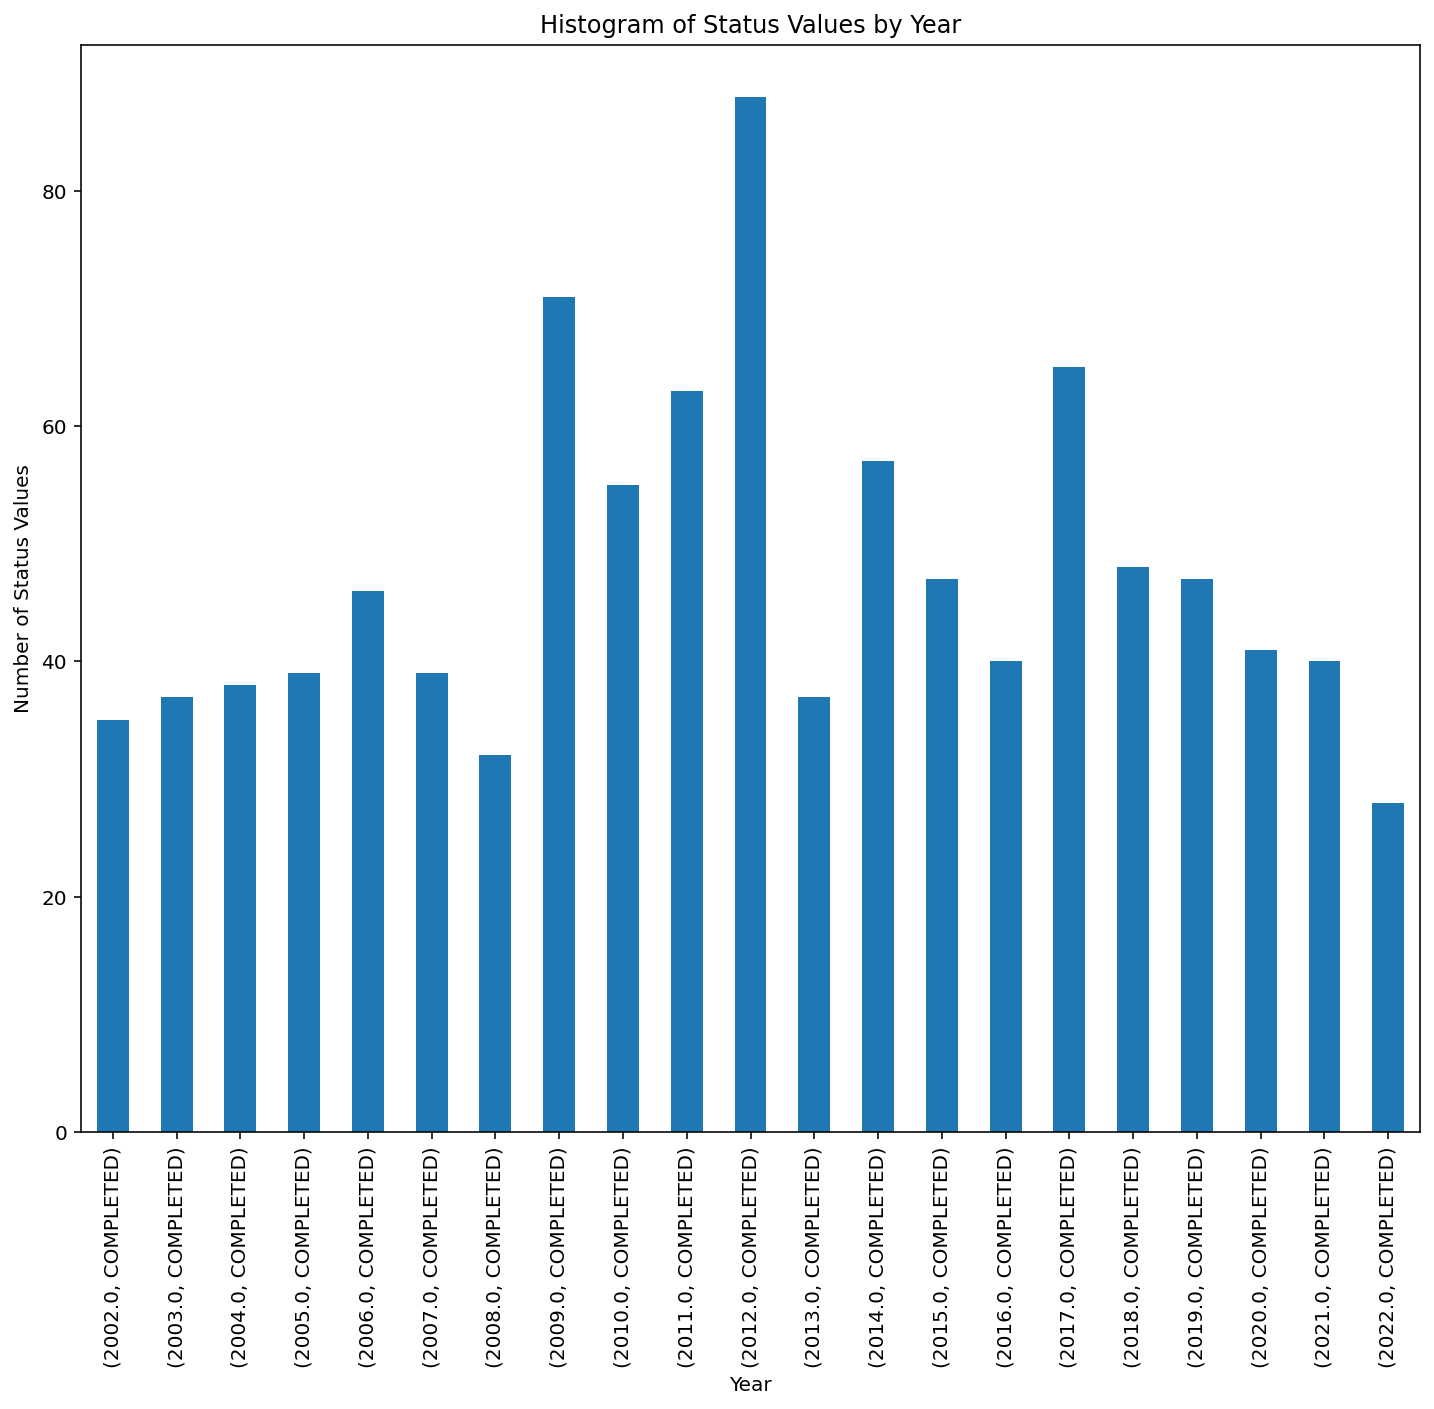

In [16]:
# Group by year and status, and count the number of occurrences
status_by_year = df.groupby('year_completed')['status'].value_counts()
plt.figure(figsize=(12,10))
# Create a bar plot of the resulting Series
status_by_year.plot(kind='bar')

# Set the plot title and axis labels
plt.title('Histogram of Status Values by Year')
plt.xlabel('Year')
plt.ylabel('Number of Status Values')

# Show the plot
plt.show()

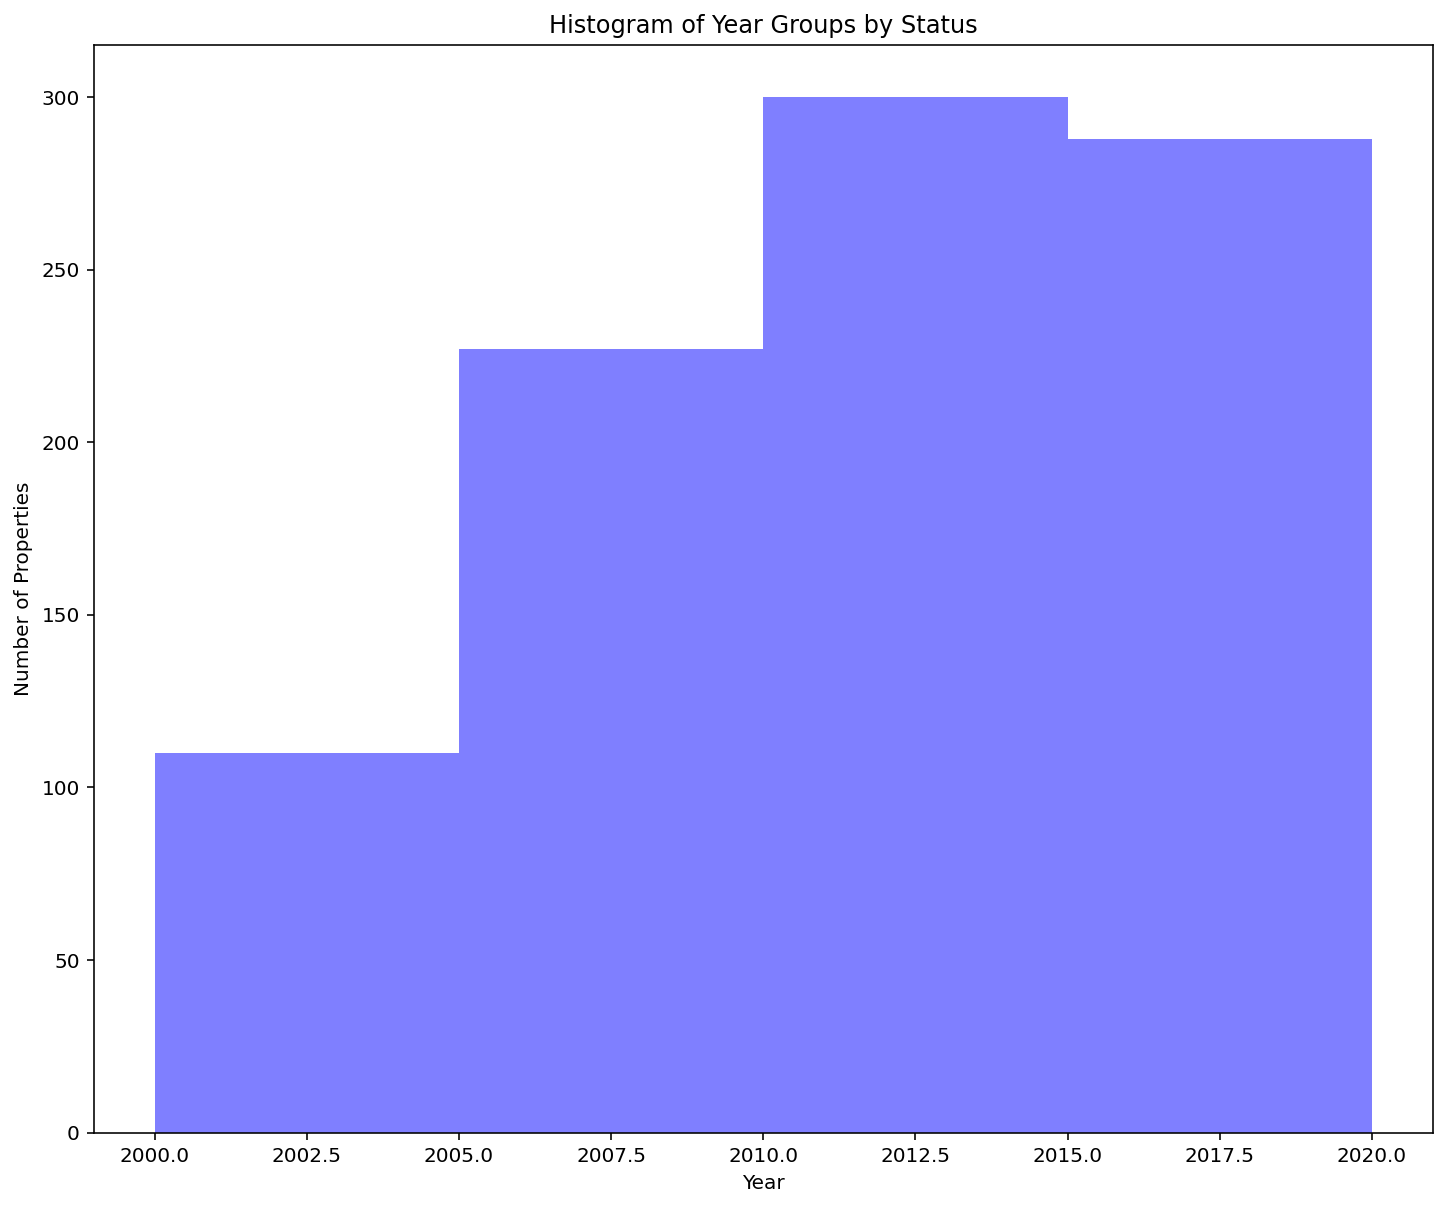

In [17]:
plt.figure(figsize=(12,10))
plt.hist(df['year_completed'], bins=range(2000, 2025, 5), color='blue', alpha=0.5)

# Set the plot title and axis labels
plt.title('Histogram of Year Groups by Status')
plt.xlabel('Year')
plt.ylabel('Number of Properties')

# Show the plot
plt.show()

### 10. Based on the original dataset, exclude the clue_small_area feature, use the rest available features and perform clustering on all the properties and determine the number of clusters. Is this the same as the number of suburbs in the data set? 

In [18]:
# Encode 'clue_small_area' column and store in y
le = LabelEncoder()
y = le.fit_transform(df['clue_small_area'])

# Drop 'clue_small_area' column from X
X = df.drop('clue_small_area', axis=1)


In [19]:
# exclude clue_small_area feature
#X = df.drop(['clue_small_area'], axis=1)

In [20]:
X = X.select_dtypes(exclude=['object'])

In [21]:
X = X.select_dtypes(exclude=['category'])

In [22]:
X.dtypes

year_completed                 float64
clue_block                       int64
property_id                      int64
property_id_2                  float64
property_id_3                  float64
property_id_4                  float64
property_id_5                  float64
floors_above                     int64
resi_dwellings                   int64
studio_dwe                       int64
one_bdrm_dwe                     int64
two_bdrm_dwe                     int64
three_bdrm_dwe                   int64
student_apartments               int64
student_beds                     int64
student_accommodation_units      int64
institutional_accom_beds         int64
hotel_rooms                      int64
serviced_apartments              int64
hotels_serviced_apartments       int64
hostel_beds                      int64
childcare_places                 int64
office_flr                       int64
retail_flr                       int64
industrial_flr                   int64
storage_flr              

In [23]:
X.isnull().sum()

year_completed                  431
clue_block                        0
property_id                       0
property_id_2                  1249
property_id_3                  1383
property_id_4                  1410
property_id_5                  1421
floors_above                      0
resi_dwellings                    0
studio_dwe                        0
one_bdrm_dwe                      0
two_bdrm_dwe                      0
three_bdrm_dwe                    0
student_apartments                0
student_beds                      0
student_accommodation_units       0
institutional_accom_beds          0
hotel_rooms                       0
serviced_apartments               0
hotels_serviced_apartments        0
hostel_beds                       0
childcare_places                  0
office_flr                        0
retail_flr                        0
industrial_flr                    0
storage_flr                       0
education_flr                     0
hospital_flr                

In [24]:
# remove rows with missing values
#X.dropna(inplace=True)

# fill in missing values with mean imputation
X.fillna(df.mean(), inplace=True)


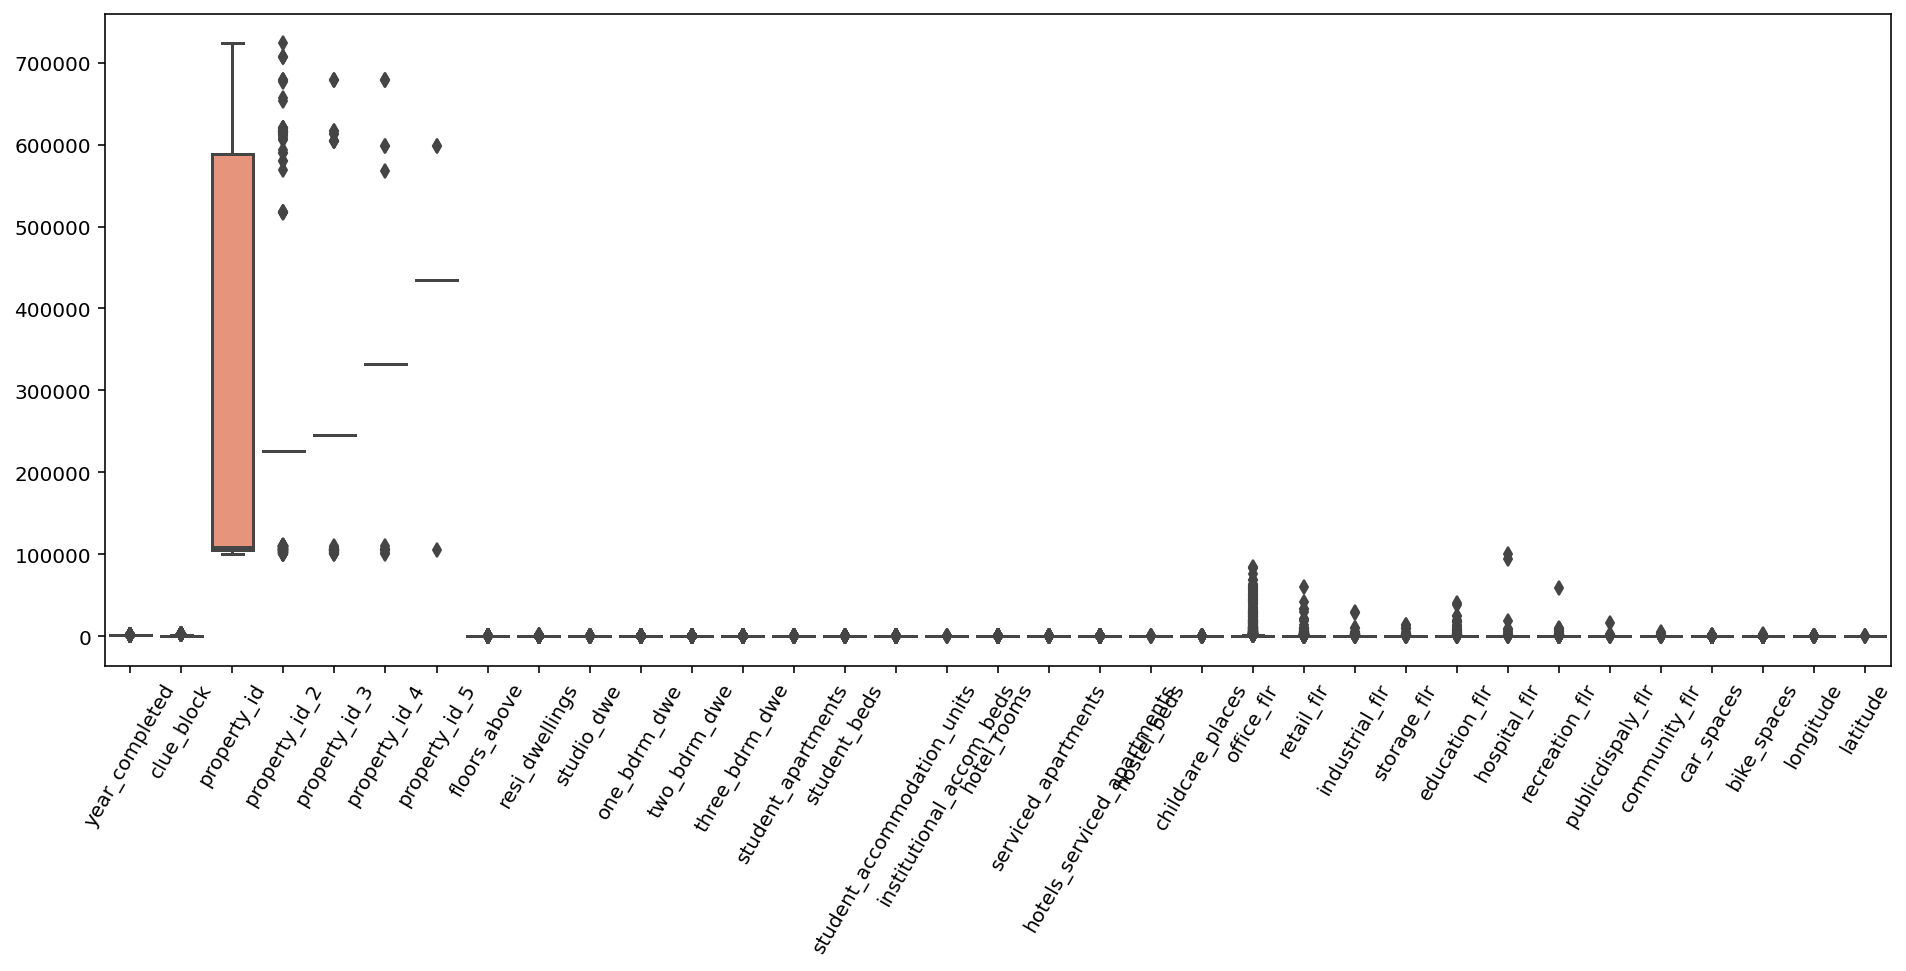

In [25]:
# compute summary statistics
X.describe()

plt.figure(figsize=(16,6))
ax = sns.boxplot(data=X)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.show()


In [26]:
X.shape

(1424, 35)

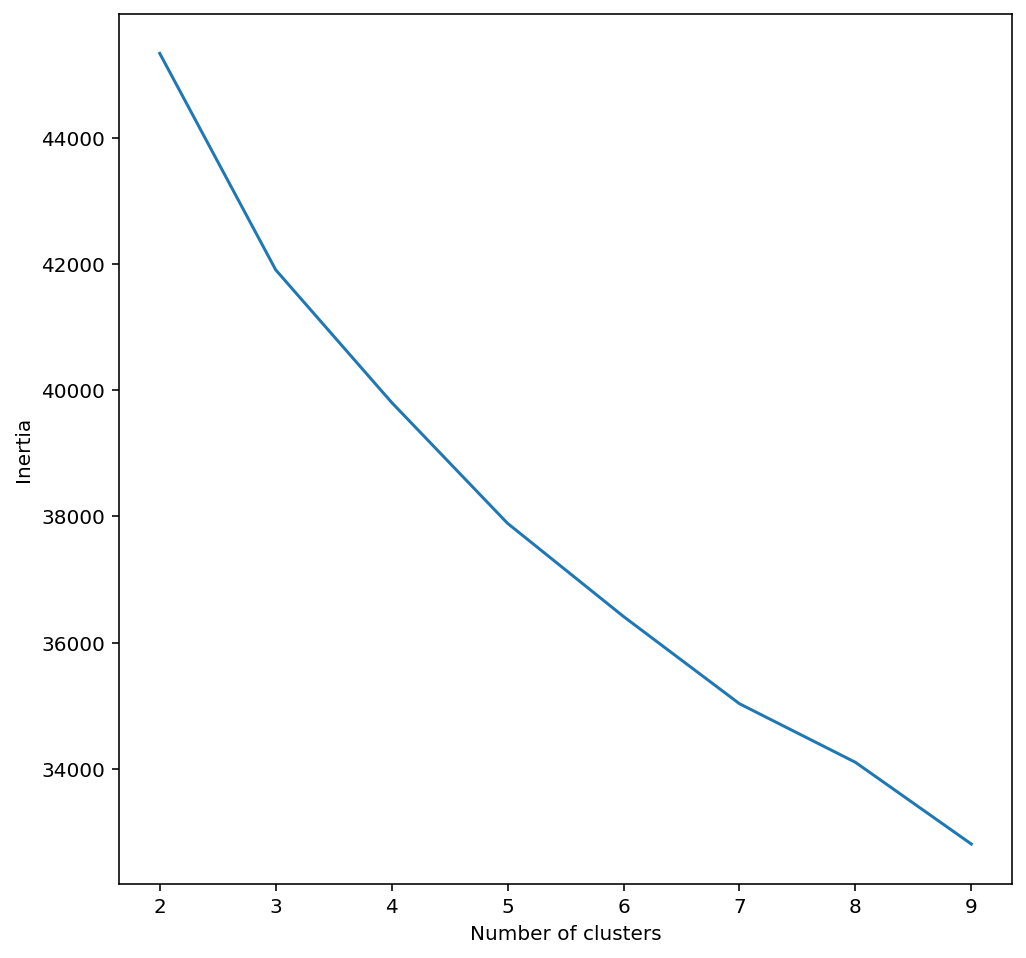

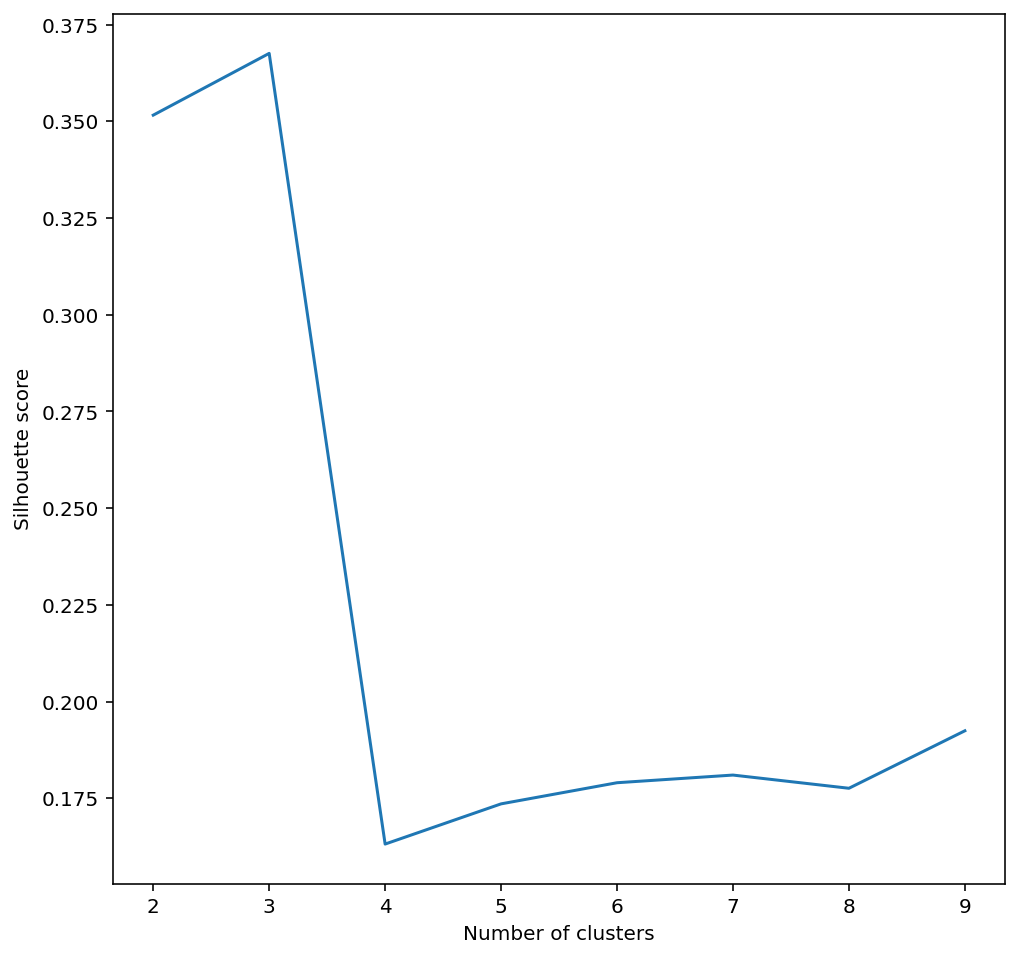

In [27]:
if X.shape[0] > 0:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
else:
    print("Dataset is empty")
# scale the features


# fit KMeans with range of cluster numbers
inertias = []
silhouettes = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, kmeans.labels_))

# plot elbow curve
plt.figure(figsize=(8,8))
plt.plot(range(2, 10), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# plot silhouette scores
plt.figure(figsize=(8,8))
plt.plot(range(2, 10), silhouettes)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

# choose optimal number of clusters based on elbow curve or silhouette score


### 11. Continue from question 10, perform K-Means and Hierarchical clustering on the data set, report the purity score. 

In [28]:

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [29]:


# Perform K-Means clustering with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Calculate purity score for K-Means clustering
kmeans_purity = purity_score(y_true=y, y_pred=kmeans_labels)
print("Purity score for K-Means clustering: {:.4f}".format(kmeans_purity))

Purity score for K-Means clustering: 0.3434


In [30]:

# Perform Hierarchical clustering with k=5
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Calculate purity score for Hierarchical clustering
hierarchical_purity = purity_score(y_true=y, y_pred=hierarchical_labels)
print("Purity score for Hierarchical clustering: {:.4f}".format(hierarchical_purity))


Purity score for Hierarchical clustering: 0.2802


### 12. Continue from question 11, try at least three different distance metrics for K-Means and Hierarchical clustering, select the best distance metric for each corresponding clustering algorithm, explain why the chosen distance metric is the best for the given data set. 

In [31]:
# scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# define the distance metrics to try
distance_metrics = ['euclidean', 'manhattan', 'cosine']

# perform K-Means clustering with different distance metrics
for dist_metric in distance_metrics:
    kmeans = KMeans(n_clusters=5, random_state=42, n_init=10, max_iter=300, algorithm='auto', 
                    init='k-means++', tol=0.0001)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, kmeans_labels, metric=dist_metric)
    print("For distance metric {}, the average silhouette score is {:.4f}".format(dist_metric, silhouette_avg))

For distance metric euclidean, the average silhouette score is 0.1736
For distance metric manhattan, the average silhouette score is 0.2142
For distance metric cosine, the average silhouette score is 0.2201


In [32]:
# scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# define the distance metrics to try
distance_metrics = ['euclidean', 'manhattan', 'cosine']

# perform hierarchical clustering with different distance metrics
for dist_metric in distance_metrics:
    hc = AgglomerativeClustering(n_clusters=5, linkage='complete', affinity=dist_metric)
    hc_labels = hc.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, hc_labels, metric=dist_metric)
    print("For distance metric {}, the average silhouette score is {:.4f}".format(dist_metric, silhouette_avg))


For distance metric euclidean, the average silhouette score is 0.7666
For distance metric manhattan, the average silhouette score is 0.4997
For distance metric cosine, the average silhouette score is 0.1338


### 13. Apart from K-Means and Hierarchical clustering, try another clustering method, and compare the results. 

In [33]:
# scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X_scaled)

# calculate silhouette score for DBSCAN clustering
silhouette_avg = silhouette_score(X_scaled, dbscan_labels)
print("Silhouette score for DBSCAN clustering: {:.4f}".format(silhouette_avg))


Silhouette score for DBSCAN clustering: -0.3002


**Copyright © Nikhil Sharma - Data Science Review 2.2C (720)**